# Import the modules needed

In [6]:
import os
import re
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [3]:
import nltk

from nltk.corpus import stopwords

# Read the training data

In [215]:
datafile = os.path.join('.', 'data', 'labeledTrainData.tsv')
df = pd.read_csv(datafile, sep = '\t', escapechar = '\\')
print('Number of reviews: {}'.format(len(df)))
pd.set_option("max_colwidth", 150)
df.head()

Number of reviews: 25000


,id,sentiment,review
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The..."
1,2381_9,1,"""The Classic War of the Worlds"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreat..."
2,7759_3,0,The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal ani...
3,3630_4,0,"It must be assumed that those who praised this film (""the greatest filmed opera ever,"" didn't I read somewhere?) either don't care for opera, don'..."
4,9495_8,1,"Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening sequences somewhat give the false impression that ..."


## Take a look at the text data is in the review

In [10]:
df['review'][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

# Prepocessing text data of movie comments
* Noticed that there are some html labels that need to be deleted
* Remove all the punction marks
* Tokenization
* Delete stopwords
* Transform as new sentences

In [17]:
def display(text, title):
    print(title)
    print("\n---------------------------\n")
    print(text)
raw_example = df['review'][0]
display(raw_example, 'Raw text data')

Raw text data

---------------------------

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The 

In [18]:
example = BeautifulSoup(raw_example, 'html.parser').get_text()
display(example, 'Remove all HTML labels')

Remove all HTML labels

---------------------------

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature 

In [19]:
example_letters = re.sub(r'[^a-zA-Z]', ' ', example)
display(example_letters, 'Remove all punction marks')

Remove all punction marks

---------------------------

With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual featu

In [20]:
words = example_letters.lower().split()
display(words, 'List of words')

List of words

---------------------------

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'o

In [21]:
stop_words = stopwords.words('english')
words_not_stop = [word for word in words if word not in stop_words]
display(words_not_stop, 'Remove all stop words')

Remove all stop words

---------------------------

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convi

## Cleansing text data and Joined as new text

In [137]:
def cleansing_text(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-z]', ' ', text)
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return words
#nltk.download('punkt')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def split_sentences(review):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = [cleansing_text(s) for s in raw_sentences if s]
    return sentences

In [112]:
cleansing_text(raw_example)

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'excluding',
 'smooth',
 'crim

# Train text model using word2vec

In [34]:
from gensim.models.word2vec import Word2Vec
def load_dataset(name, nrows=None):
    datasets = {
        'unlabeled_train': 'unlabeledTrainData.tsv',
        'labeled_train': 'labeledTrainData.tsv',
        'test': 'testData.tsv'
    }
    if name not in datasets:
        raise ValueError(name)
    data_file = os.path.join('.', 'data', datasets[name])
    df = pd.read_csv(data_file, sep = '\t', escapechar = '\\', nrows = nrows)
    print('Number of reviews: {}'.format(len(df)))
    return df

In [35]:
df_unlabel = load_dataset('unlabeled_train')
df_unlabel.head()

Number of reviews: 50000


,id,review
0,9999_0,"Watching Time Chasers, it obvious that it was ..."
1,45057_0,I saw this film about 20 years ago and remembe...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,7161_0,I went to see this film with a great deal of e...
4,43971_0,"Yes, I agree with everyone on this site this m..."


In [135]:
df_label = load_dataset('labeled_train')
df_label.head()

Number of reviews: 25000


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"""The Classic War of the Worlds"" by Timothy Hin..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [141]:
%time unlabel_clean_review = sum(df_unlabel.review.apply(lambda x : split_sentences(x)), [])
print('{}reviews -> {}sentences'.format(len(df_unlabel), len(unlabel_clean_review)))

50000reviews -> 537851sentences


In [138]:
%time label_clean_review = sum(df_label.review.apply(lambda x : split_sentences(x)), [])
print('{}reviews -> {}sentences'.format(len(df_label), len(label_clean_review)))

Wall time: 6min 50s
25000reviews -> 270853sentences


In [149]:
clean_review = unlabel_clean_review + label_clean_review

## Use word2vec to train text model for unlabeled data

In [123]:
#parameters
num_features = 300 # Word Vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4 # Number of threads to run in parallel
context = 10 # Context window size
downsampling = 1e-3 # Downsample setting for frequent words

model_name = '{}features_{}minwords_{}context.model'.format(num_features, min_word_count, context)

In [150]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(clean_review, workers = num_workers, vector_size = num_features,
                 min_count = min_word_count, window = context, sample = downsampling)

model.save(os.path.join('.', 'models', model_name)) # save word2vec model for furture use

In [151]:
# check the performance of trained model
print(model.wv.doesnt_match("man woman child ketchen".split()))
print(model.wv.doesnt_match("france england germany berlin".split()))

child
berlin


In [152]:
model.wv.most_similar("man")

[('men', 0.5283200144767761),
 ('lady', 0.5174608826637268),
 ('woman', 0.5027450919151306),
 ('mans', 0.48372578620910645),
 ('reggie', 0.4449959397315979),
 ('monk', 0.4437698721885681),
 ('lad', 0.442023903131485),
 ('farmer', 0.43917733430862427),
 ('chap', 0.4214562773704529),
 ('guy', 0.41858959197998047)]

In [153]:
model.wv.most_similar("queen")

[('princess', 0.6262275576591492),
 ('eva', 0.5823542475700378),
 ('duchess', 0.5753462314605713),
 ('latifah', 0.5725922584533691),
 ('belle', 0.5700823068618774),
 ('goddess', 0.5668851733207703),
 ('isabel', 0.5615292191505432),
 ('anita', 0.5505237579345703),
 ('bride', 0.5471926927566528),
 ('nun', 0.5459595918655396)]

In [167]:
def to_review_vector(review):
    #use the mean value of the words as the vector of the sentence
    words = cleansing_text(review)
    array = np.array([model.wv[w] for w in words if w in model.wv])
    return pd.Series(array.mean(axis = 0))

#vectorize the sentence of the labeled training data

df_train = load_dataset('labeled_train')
train_data_features = df_train.review.apply(to_review_vector)
train_data_features.head()

Number of reviews: 25000


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.006033,0.021206,0.029782,-0.057216,-0.038412,0.003150,-0.060341,-0.144546,-0.106382,-0.006636,...,0.155378,-0.088542,-0.289832,0.112069,-0.008902,0.082921,-0.039337,0.070428,0.005612,-0.277294
1,0.140054,0.182112,-0.146424,-0.360172,-0.044188,0.185405,0.298438,-0.415342,-0.250500,0.202113,...,0.038281,-0.153653,-0.065498,-0.165783,-0.021736,-0.298725,-0.075897,0.316868,0.108901,-0.248663
2,-0.203811,0.062003,-0.049446,-0.156657,0.049060,0.064771,0.012637,0.141286,0.190667,0.160662,...,0.161974,-0.004489,-0.054622,-0.127399,-0.115682,0.015620,0.017902,0.006247,0.035626,0.100877
3,0.148645,0.208936,-0.051428,-0.119591,0.039435,-0.117360,0.030383,0.347050,-0.014158,-0.333457,...,-0.001477,-0.180829,0.088825,-0.003349,-0.092371,-0.251607,-0.041260,0.149589,-0.166999,-0.032172
4,-0.039745,0.111092,0.002070,-0.127549,0.017630,-0.062741,0.116253,0.154044,0.095956,-0.031767,...,-0.000331,-0.058054,-0.030611,0.067840,-0.086973,-0.079138,0.051557,-0.171607,0.030606,-0.056673


# Use RandomForestClassfier to fit the model

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_data_features,
    df_train.sentiment,
    test_size=0.05,
    shuffle=True,
    random_state=42)

In [188]:
rnd_clf1 = RandomForestClassifier(n_estimators = 300, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf1 = rnd_clf1.fit(X_train, y_train)

In [192]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, rnd_clf1.predict(X_train)))
print(confusion_matrix(y_test, rnd_clf1.predict(X_test)))

[[ 9374  2489]
 [ 1775 10112]]
[[500 137]
 [ 93 520]]


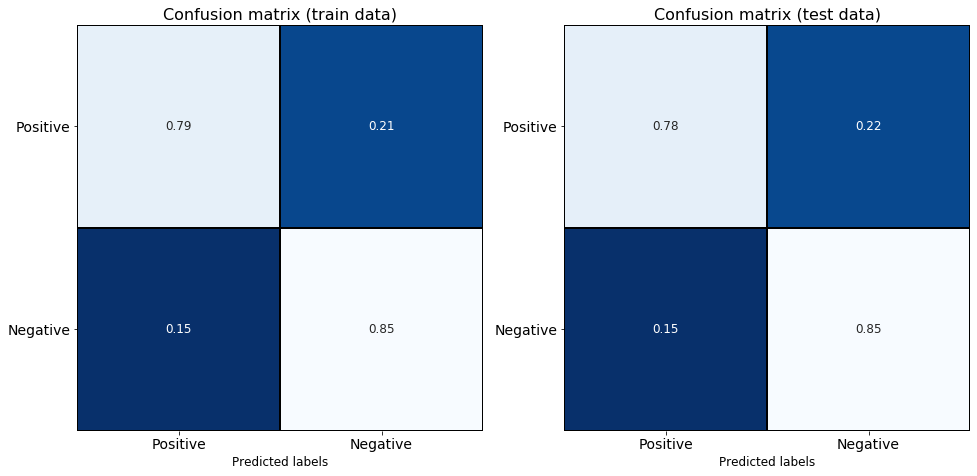

In [204]:
import matplotlib.pyplot as plt
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16
LARGE_SIZE = 20

params = {
    'figure.figsize': (16, 8),
    'font.size': SMALL_SIZE,
    'xtick.labelsize': MEDIUM_SIZE,
    'ytick.labelsize': MEDIUM_SIZE,
    'legend.fontsize': BIG_SIZE,
    'figure.titlesize': LARGE_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': BIG_SIZE
}
plt.rcParams.update(params)

import seaborn as sns


def plot_confusion_matrix(y_true, y_pred, ax, class_names, vmax=None,
                          normed=True, title='Confusion matrix'):
    matrix = confusion_matrix(y_true,y_pred)
    if normed:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(matrix, vmax=vmax, annot=True, square=True, ax=ax,
               cmap=plt.cm.Blues_r, cbar=False, linecolor='black',
               linewidths=1, xticklabels=class_names)
    ax.set_title(title, y=1.20, fontsize=16)
    #ax.set_ylabel('True labels', fontsize=12)
    ax.set_xlabel('Predicted labels', y=1.00, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2)
plot_confusion_matrix(y_train, rnd_clf1.predict(X_train), ax=axis1,
                      title='Confusion matrix (train data)',
                      class_names=['Positive', 'Negative'])
plot_confusion_matrix(y_test, rnd_clf1.predict(X_test), ax=axis2,
                      title='Confusion matrix (test data)',
                      class_names=['Positive', 'Negative'])

# Fine tune hyperparameters of RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
%time
param_grid = [
    {
        'n_estimators': [100, 300],
        'max_features': [20, 50, 100],        
    }
]

rnd_clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rnd_clf, param_grid = param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(X_train, y_train)

Wall time: 0 ns


In [208]:
grid_search.best_params_

{'max_features': 50, 'n_estimators': 100}

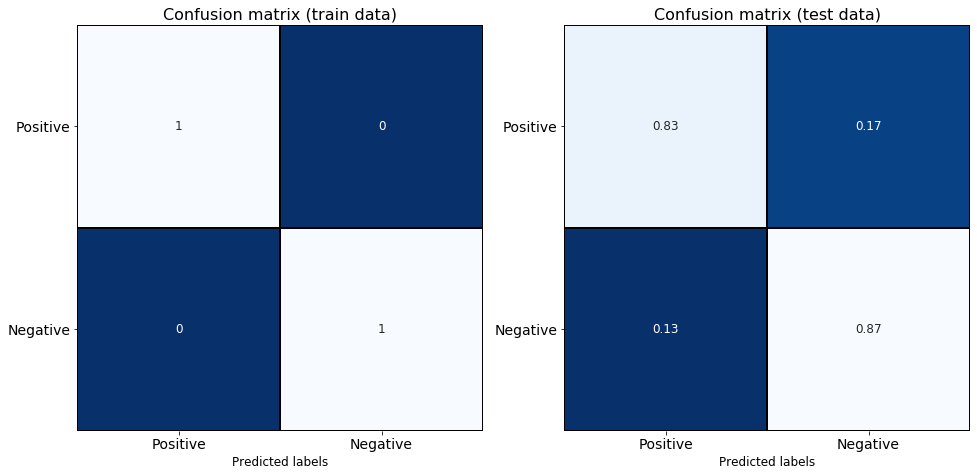

In [209]:
rnd_clf2 = RandomForestClassifier(n_estimators = 100, max_features = 50, n_jobs = -1)
rnd_clf2 = rnd_clf2.fit(X_train, y_train)
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2)
plot_confusion_matrix(y_train, rnd_clf2.predict(X_train), ax=axis1,
                      title='Confusion matrix (train data)',
                      class_names=['Positive', 'Negative'])
plot_confusion_matrix(y_test, rnd_clf2.predict(X_test), ax=axis2,
                      title='Confusion matrix (test data)',
                      class_names=['Positive', 'Negative'])

In [211]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for training samples: {}", accuracy_score(y_train, rnd_clf2.predict(X_train)))
print("Accuracy Score for test samples: {}", accuracy_score(y_test, rnd_clf2.predict(X_test)))

Accuracy Score for training samples: {} 1.0
Accuracy Score for test samples: {} 0.8504
